In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [4]:
data=data.drop(columns=['society','balcony','availability','area_type',])


In [5]:
data.shape

(13320, 5)

In [6]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
data['location']=data['location'].fillna('Unknown')
data['bath']=data['bath'].fillna(data['bath'].median())

In [8]:
data['size']=data['size'].fillna('2 BHK')

In [9]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
data['BHK']=data['size'].apply(lambda x : int(x.split(' ')[0]))

In [11]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
data.drop(columns=['size'],axis=1,inplace=True)

In [13]:
data[data.BHK >20]

,location,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [14]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def convert_to_numeric(value):
    try:
        # Try to directly convert to a float
        return float(value)
    except ValueError:
        # Handle ranges like "1200-1500"
        if isinstance(value, str) and '-' in value:
            vals = value.split('-')
            try:
                return (float(vals[0]) + float(vals[1])) / 2
            except ValueError:
                return None  # If split parts aren't numbers
        return None  # For non-numeric, non-range strings

# Strip whitespace and apply the conversion function
data['total_sqft'] = data['total_sqft'].str.strip().apply(convert_to_numeric)

# Check for rows where conversion failed
print(data['total_sqft'].isnull().sum())  # Debugging: Count NaN values

# Remove rows where total_sqft is still None or NaN
data = data[data['total_sqft'].notnull()]

46


In [16]:
data.iloc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [17]:
data['price_per_sqft']= data['price']*100000/data['total_sqft']
data.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [18]:
data['location'].value_counts()

location
Whitefield               538
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           271
Thanisandra              233
                        ... 
BEML Layout 5th stage      1
Kannur                     1
singapura paradise         1
Uvce Layout                1
Abshot Layout              1
Name: count, Length: 1300, dtype: int64

In [19]:
data['location']=data['location'].apply(lambda x : x.strip())

In [20]:
location_counts=data['location'].value_counts()<=10

In [21]:
# Get the Boolean series indicating locations with counts <= 10
loc_less_10 = data['location'].value_counts() <= 10

# Filter the locations that satisfy the condition
locations_with_less_than_10 = loc_less_10[loc_less_10].index

print(locations_with_less_than_10)


Index(['Kalkere', 'Thyagaraja Nagar', 'BTM 1st Stage', 'Basapura',
       'Dodsworth Layout', 'Nagappa Reddy Layout', 'Sector 1 HSR Layout',
       'Dairy Circle', 'Naganathapura', 'Nagadevanahalli',
       ...
       'Housing Board Layout Vijay Nagar', 'Unknown', 'Marathalli bridge',
       'Papareddipalya', 'K R C kothanur', '1Channasandra', 'Hosahalli',
       'Vijayabank bank layout', 'near Ramanashree California resort',
       'Abshot Layout'],
      dtype='object', name='location', length=1049)


In [22]:
data.location = data.location.apply(lambda x : 'other' if x in locations_with_less_than_10 else x)

In [23]:
data['location'].value_counts()

location
other              2877
Whitefield          539
Sarjapur  Road      399
Electronic City     304
Kanakpura Road      271
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

In [24]:
data[ (data.total_sqft /data.BHK <300 )]

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [26]:
data=data [~(data.total_sqft /data.BHK <300 )]
data.shape

(12530, 6)

In [27]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [28]:
def remove_outlier_from_price_per_sqft(data):
    data_out = pd.DataFrame()
    for key,sub in data.groupby('location'):
        m = np .mean(sub.price_per_sqft)
        st = np.std(sub.price_per_sqft)
        reduce_data =sub[( sub.price_per_sqft> (m-st) ) & (sub.price_per_sqft <= (m+st) ) ]
        data_out = pd.concat( [ data_out,reduce_data] ,ignore_index = True)
    return data_out

In [29]:
data1 = remove_outlier_from_price_per_sqft(data)
data1.shape

(10302, 6)

In [30]:
data1.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


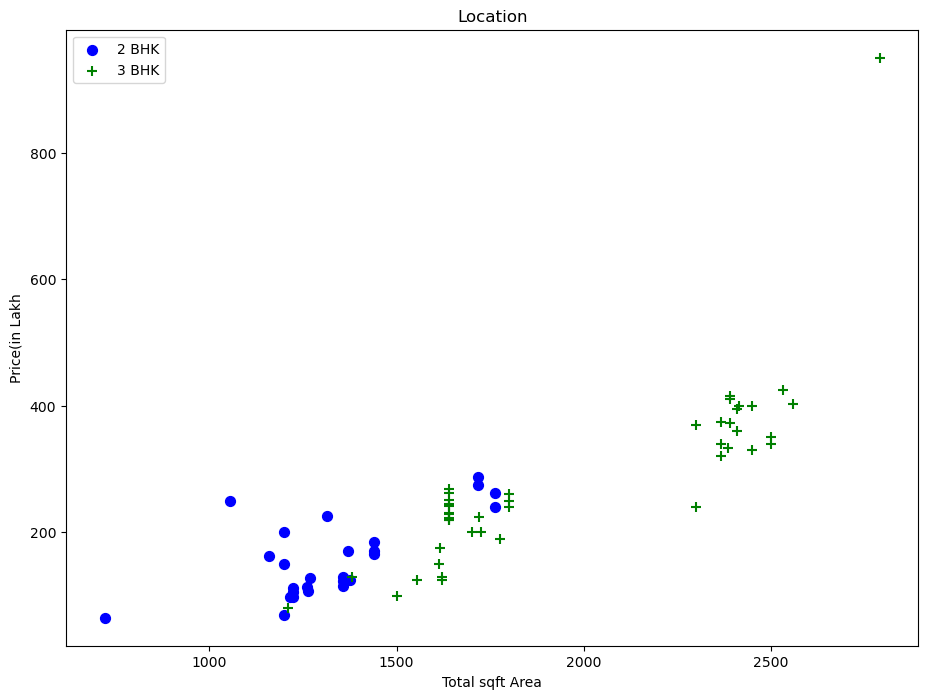

In [32]:
def plotter_scatter_chart(data,location):
    bhk2= data[(data.location == location ) & (data.BHK==2)]
    bhk3= data[(data.location == location ) & (data.BHK==3)]
    plt.rcParams['figure.figsize'] = (11,8)
    plt.scatter(bhk2.total_sqft,bhk2.price,color ='blue',label = '2 BHK' ,s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+',color ='green',label = '3 BHK' ,s=50)
    plt.xlabel('Total sqft Area')
    plt.ylabel('Price(in Lakh')
    plt.title('Location')
    plt.legend()

plotter_scatter_chart(data,'Rajaji Nagar')

In [33]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location,location_data in data.groupby('location'):
        BHK_stats ={}
        for BHK,BHK_data in location_data.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean' : np.mean(BHK_data.price_per_sqft),
                'std' : np.std(BHK_data.price_per_sqft),
                'count': BHK_data.shape[0]
            }
        for BHK,BHK_data in location_data.groupby('BHK'):
            stats = BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,BHK_data[BHK_data.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data2 = remove_bhk_outliers(data1)
data2.shape
        

(7348, 6)

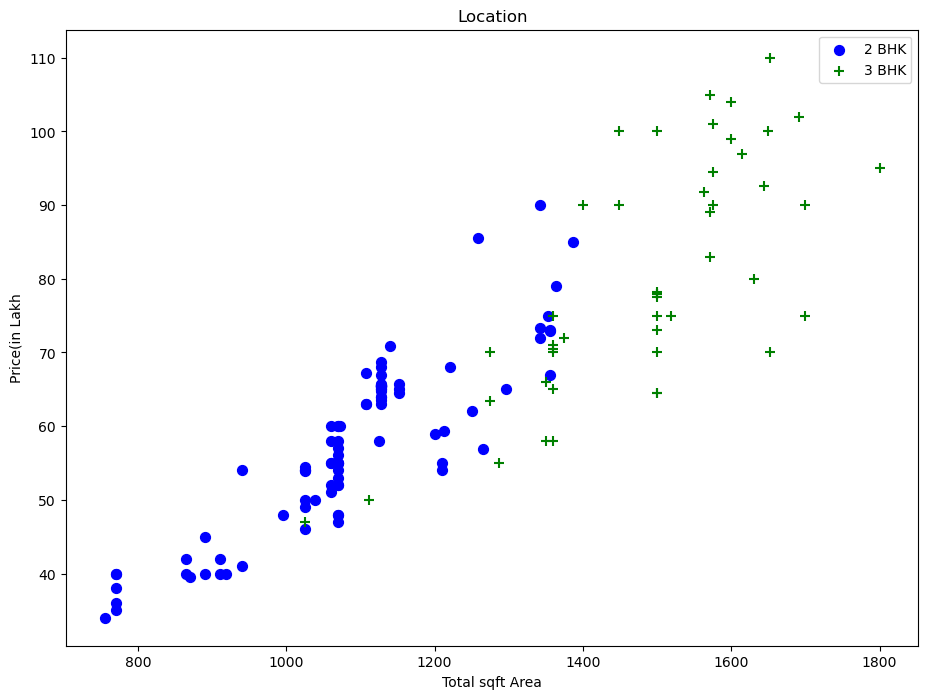

In [34]:
plotter_scatter_chart (data2,'Electronic City')

In [ ]:
data2

In [ ]:
data2['location'].value_counts()

In [ ]:
data2.bath.unique()

In [ ]:
data2[data2.bath>10]

Text(0, 0.5, 'Count')

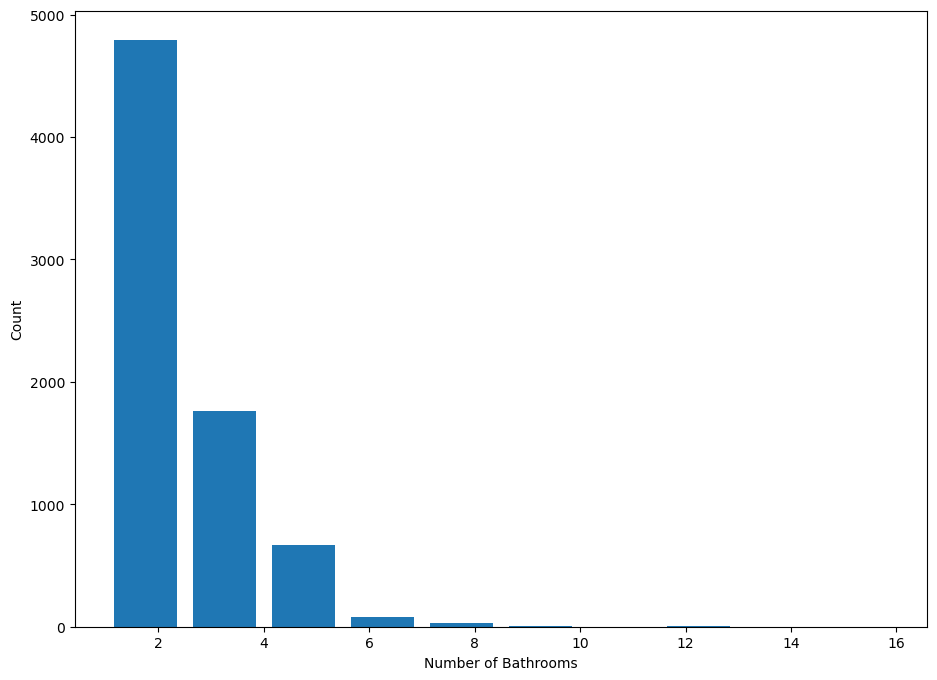

In [35]:
plt.hist(data2.bath,rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [36]:
data2[( data2.bath > data2.BHK+2)]

,location,total_sqft,bath,price,BHK,price_per_sqft
1637,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6759,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8465,other,11338.0,9.0,1000.0,6,8819.897689


In [37]:
data2 = data2[~( data2.bath > data2.BHK+2)]
data2.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [39]:
data3 = data2.drop(['price_per_sqft'],axis='columns')
data3.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [40]:
dummies = pd.get_dummies(data3.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
data3 = pd.concat([data3,dummies.drop('other',axis ='columns')],axis='columns')
data3.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
data3.drop('location',axis='columns',inplace=True)
data3.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data3.shape

In [43]:
x = data3.drop('price',axis=1)
y = data3['price']

In [56]:
x.shape

(7344, 243)

In [ ]:
y.shape

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [45]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5875, 243), (1469, 243), (5875,), (1469,))

## Applying Linear REgression

In [46]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.840801861106785

In [47]:
pred = lr.predict(x_test)
pred

array([ 60.82203392,   8.33802623,  92.24419399, ..., 111.67094467,
        76.01687959,  44.50103795])

In [57]:
y_test

4226     58.0
4462     22.0
8479     75.0
1114     72.0
79      100.0
        ...  
431      14.0
4235     95.0
4741    120.0
6680     75.0
3249     38.0
Name: price, Length: 1469, dtype: float64

## Applying Lasso

In [48]:
lasso = Lasso()
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)

0.719163198203514

## Applying Ridge

In [91]:
ridge = Ridge()
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)

0.8365038352327103

In [89]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.840801861106785

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")


Best alpha: 0.1


In [93]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

# Evaluate the model
r2_score = ridge.score(x_test, y_test)
print(f"R² Score with alpha=0.1: {r2_score}")


R² Score with alpha=0.1: 0.8404681856639954


In [96]:
import pickle

# Save the trained model
with open("ridge_model.pkl", "wb") as file:
    pickle.dump(ridge, file)

print("Model saved successfully!")


Model saved successfully!
